# Pymaceuticals Inc.
---

### Analysis
* Capomulin and Ramicane showed the smallest tumor volume at the end of the study.
* There appears to be a correlation between mouse weight and the average tumor volume; as weight increases, tumor volume increases.
* Capomulin had the lowest IQR, indicating a more narrow spread in the results for this drug regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
clinical_trial=pd.merge(study_results, mouse_metadata, how='left')
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
clinical_trial.shape

(1893, 8)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [8]:
mean_df = clinical_trial.groupby('Drug Regimen').mean().reset_index()
mean_df = mean_df[['Drug Regimen', 'Tumor Volume (mm3)']]
mean_df = mean_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
mean_df

,Drug Regimen,Mean Tumor Volume
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.322552
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [9]:
median_df=clinical_trial.groupby('Drug Regimen').median().reset_index()
median_df=median_df[['Drug Regimen', 'Tumor Volume (mm3)']]
median_df=median_df.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
median_df

,Drug Regimen,Median Tumor Volume
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.854632
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [10]:
drug_summary=pd.merge(mean_df, median_df, how="inner")
drug_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume
0,Capomulin,40.675741,41.557809
1,Ceftamin,52.591172,51.776157
2,Infubinol,52.884795,51.820584
3,Ketapril,55.235638,53.698743
4,Naftisol,54.331565,52.509285
5,Placebo,54.033581,52.288934
6,Propriva,52.322552,50.854632
7,Ramicane,40.216745,40.673236
8,Stelasyn,54.233149,52.431737
9,Zoniferol,53.236507,51.818479


In [11]:
variance_df=clinical_trial.groupby('Drug Regimen').var().reset_index()
variance_df=variance_df[['Drug Regimen', 'Tumor Volume (mm3)']]
variance_df=variance_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
variance_df

,Drug Regimen,Tumor Volume Variance
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,42.351070
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [12]:
drug_summary=pd.merge(drug_summary, variance_df, how="inner")
drug_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479
5,Placebo,54.033581,52.288934,61.168083
6,Propriva,52.322552,50.854632,42.351070
7,Ramicane,40.216745,40.673236,23.486704
8,Stelasyn,54.233149,52.431737,59.450562
9,Zoniferol,53.236507,51.818479,48.533355


In [13]:
std_df=clinical_trial.groupby('Drug Regimen').std().reset_index()
std_df=std_df[['Drug Regimen', 'Tumor Volume (mm3)']]
std_df=std_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
std_df

,Drug Regimen,Tumor Volume Std. Dev.
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.507770
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [14]:
drug_summary=pd.merge(drug_summary, std_df, how="inner")
drug_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.322552,50.854632,42.351070,6.507770
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


In [15]:
sem_df=clinical_trial.groupby('Drug Regimen').sem().reset_index()
sem_df=sem_df[['Drug Regimen', 'Tumor Volume (mm3)']]
sem_df=sem_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})
sem_df

,Drug Regimen,Tumor Volume Std. Err.
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.512884
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [16]:
drug_summary=pd.merge(drug_summary, sem_df, how="inner")
drug_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [17]:
drug_count=clinical_trial.groupby('Drug Regimen').count().reset_index()
drug_count=drug_count[['Drug Regimen', 'Tumor Volume (mm3)']]
drug_count=drug_count.rename(columns={'Tumor Volume (mm3)':'Count'})
drug_count

,Drug Regimen,Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [18]:
drug_summary=pd.merge(drug_summary, drug_count, how="inner")
drug_summary = drug_summary.sort_values('Count', ascending=False)
drug_summary

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.,Count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398,182
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161


## Bar and Pie Charts

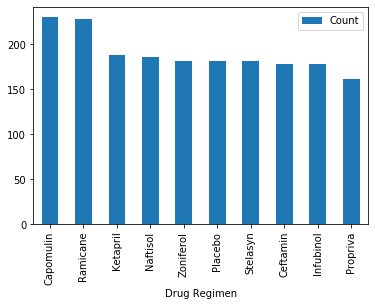

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_summary.sort_values('Count', ascending=False).plot.bar(x="Drug Regimen", y="Count")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

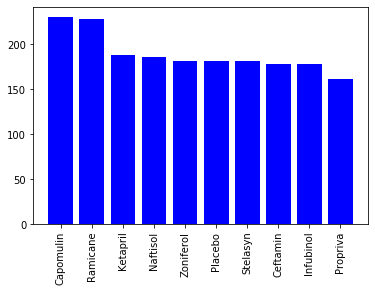

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_summary['Drug Regimen'], drug_summary['Count'], color="b", align="center")
plt.xticks(rotation='vertical')

In [21]:
# Create a gender dataframe
gender_df = clinical_trial.groupby('Sex').count()
gender_df = gender_df[['Mouse ID']]
gender_df = gender_df.rename(columns={'Mouse ID':'Gender Count'})
gender_df

,Gender Count
Sex,
Female,935
Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200F4672DC8>],
      dtype=object)

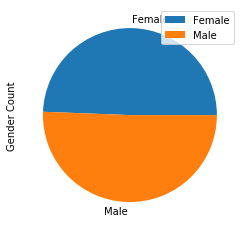

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df.plot.pie(subplots=True)

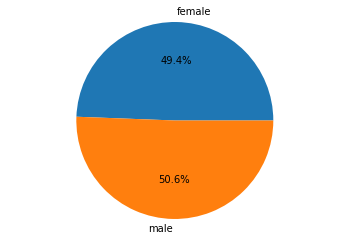

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders= ['female', 'male']
plt.pie(gender_df['Gender Count'], labels=genders, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse. 
tumor_df = clinical_trial.groupby('Mouse ID').last()
tumor_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29


In [25]:
# Calculate the final tumor volume of each mouse in Capomulin treatment regime. 
capomulin = tumor_df.loc[(tumor_df['Drug Regimen'] == "Capomulin"),:]
capomulin.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,45,38.982878,2,Capomulin,Female,9,22
b742,45,38.939633,0,Capomulin,Male,7,21
f966,20,30.485985,0,Capomulin,Male,16,17
g288,45,37.074024,1,Capomulin,Male,3,19
g316,45,40.159220,2,Capomulin,Female,22,22


In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_quartiles = capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"The lower quartile of the Capomulin test group is: {cap_lowerq}")
print(f"The upper quartile of the Capomulin test group is: {cap_upperq}")
print(f"The interquartile range of the Capomulin test group  is: {cap_iqr}")
print(f"The the median of the Capomulin test group is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of the Capomulin test group is: 32.37735684
The upper quartile of the Capomulin test group is: 40.1592203
The interquartile range of the Capomulin test group  is: 7.781863460000004
The the median of the Capomulin test group is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
# Calculate the final tumor volume of each mouse in Ramicane treatment regime. 
ramicane = tumor_df.loc[(tumor_df['Drug Regimen'] == "Ramicane"),:]
ramicane.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
a520,45,38.810366,1,Ramicane,Male,13,21
a644,45,32.978522,1,Ramicane,Female,7,17
c458,30,38.342008,2,Ramicane,Female,23,20


In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_quartiles = ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of the Ramicane test group is: {ram_lowerq}")
print(f"The upper quartile of the Ramicane test group is: {ram_upperq}")
print(f"The interquartile range of the Ramicane test group  is: {ram_iqr}")
print(f"The the median of the Ramicane test group is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of the Ramicane test group is: 31.56046955
The upper quartile of the Ramicane test group is: 40.65900627
The interquartile range of the Ramicane test group  is: 9.098536719999998
The the median of the Ramicane test group is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [29]:
# Calculate the final tumor volume of each mouse in Infubinol treatment regime.
infubinol = tumor_df.loc[(tumor_df['Drug Regimen'] == "Infubinol"),:]
infubinol.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a577,30,57.031862,2,Infubinol,Female,6,25
a685,45,66.083066,3,Infubinol,Male,8,30
c139,45,72.226731,2,Infubinol,Male,11,28


In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inf_quartiles = infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of the Infubinol test group is: {inf_lowerq}")
print(f"The upper quartile of the Infubinol test group is: {inf_upperq}")
print(f"The interquartile range of the Infubinol test group  is: {inf_iqr}")
print(f"The the median of the Infubinol test group is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of the Infubinol test group is: 54.04860769
The upper quartile of the Infubinol test group is: 65.52574285
The interquartile range of the Infubinol test group  is: 11.477135160000003
The the median of the Infubinol test group is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [31]:
# Calculate the final tumor volume of each mouse in Ceftamin treatment regime. 
ceftamin = tumor_df.loc[(tumor_df['Drug Regimen'] == "Ceftamin"),:]
ceftamin.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a275,45,62.999356,3,Ceftamin,Female,20,28
b447,0,45.000000,0,Ceftamin,Male,2,30
b487,25,56.057749,1,Ceftamin,Female,6,28
b759,30,55.742829,1,Ceftamin,Female,12,25
f436,15,48.722078,2,Ceftamin,Female,3,25


In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cef_quartiles = ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"The lower quartile of the Infubinol test group is: {cef_lowerq}")
print(f"The upper quartile of the Infubinol test group is: {cef_upperq}")
print(f"The interquartile range of the Infubinol test group  is: {cef_iqr}")
print(f"The the median of the Infubinol test group is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of the Infubinol test group is: 48.72207785
The upper quartile of the Infubinol test group is: 64.29983003
The interquartile range of the Infubinol test group  is: 15.577752179999997
The the median of the Infubinol test group is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [33]:
#Created new dataframe for four drugs of interest
regimen_of_interest = tumor_df.loc[(tumor_df['Drug Regimen'] == 'Capomulin') |
                                   (tumor_df['Drug Regimen'] == 'Ramicane') |
                                   (tumor_df['Drug Regimen'] == 'Infubinol')|
                                   (tumor_df['Drug Regimen'] == 'Ceftamin')]
regimen_of_interest

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,31.896238,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


<function matplotlib.pyplot.show(*args, **kw)>

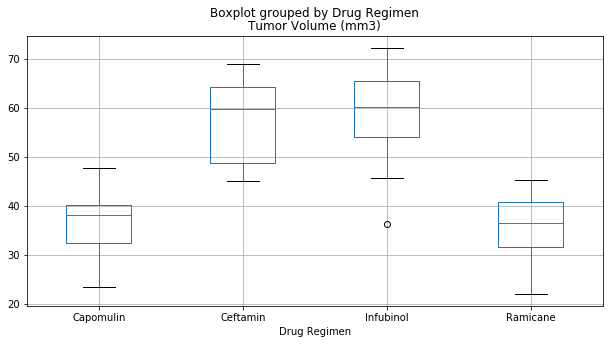

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_of_interest.boxplot('Tumor Volume (mm3)', by='Drug Regimen', figsize=(10, 5))
plt.show

## Line and Scatter Plots

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [55]:
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
single_mouse = clinical_trial[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
single_mouse = single_mouse.loc[(single_mouse['Drug Regimen'] == "Capomulin"),:].reset_index()
single_mouse = single_mouse.loc[(single_mouse['Mouse ID'] == "b128"),:]
single_mouse

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,0,b128,0,45.000000,Capomulin
47,472,b128,5,45.651331,Capomulin
70,679,b128,10,43.270852,Capomulin
76,719,b128,15,43.784893,Capomulin
101,933,b128,20,42.731552,Capomulin
139,1268,b128,25,43.262145,Capomulin
157,1400,b128,30,40.605335,Capomulin
177,1547,b128,35,37.967644,Capomulin
188,1629,b128,40,38.379726,Capomulin
209,1764,b128,45,38.982878,Capomulin


Text(0.5, 0, 'Timepoint')

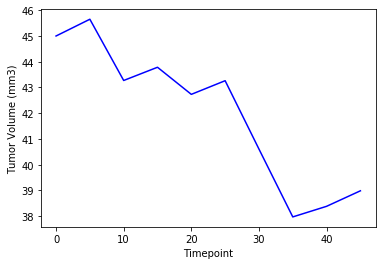

In [78]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], color='blue', label="Mouse treated with Capomulin, Subject b128")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

In [62]:
# Create new dataframe 
# Capomulin test group

mouse_treatment = clinical_trial[['Mouse ID', 'Drug Regimen']]
mouse_treatment

,Mouse ID,Drug Regimen
0,b128,Capomulin
1,f932,Ketapril
2,g107,Ketapril
3,a457,Ketapril
4,c819,Ketapril
...,...,...
1888,r944,Capomulin
1889,u364,Capomulin
1890,p438,Ceftamin
1891,x773,Placebo


In [63]:
mean_mouse = clinical_trial.groupby('Mouse ID').mean().reset_index()
mean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,a203,22.5,56.312708,1.100000,20.0,23.0
1,a251,22.5,55.237095,0.800000,21.0,25.0
2,a262,22.5,58.611631,2.300000,17.0,29.0
3,a275,22.5,52.770965,1.200000,20.0,28.0
4,a366,15.0,54.639906,0.142857,16.0,29.0


In [64]:
merged_group=pd.merge(mean_mouse, mouse_treatment, how='inner').reset_index()
merged_group.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g),Drug Regimen
0,0,a203,22.5,56.312708,1.1,20.0,23.0,Infubinol
1,1,a203,22.5,56.312708,1.1,20.0,23.0,Infubinol
2,2,a203,22.5,56.312708,1.1,20.0,23.0,Infubinol
3,3,a203,22.5,56.312708,1.1,20.0,23.0,Infubinol
4,4,a203,22.5,56.312708,1.1,20.0,23.0,Infubinol


In [65]:
capomulin_test_group = merged_group.loc[(merged_group['Drug Regimen'] == "Capomulin"),:].reset_index()
capomulin_test_group.head()

,level_0,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g),Drug Regimen
0,174,174,b128,22.5,41.963636,0.7,9.0,22.0,Capomulin
1,175,175,b128,22.5,41.963636,0.7,9.0,22.0,Capomulin
2,176,176,b128,22.5,41.963636,0.7,9.0,22.0,Capomulin
3,177,177,b128,22.5,41.963636,0.7,9.0,22.0,Capomulin
4,178,178,b128,22.5,41.963636,0.7,9.0,22.0,Capomulin


<function matplotlib.pyplot.show(*args, **kw)>

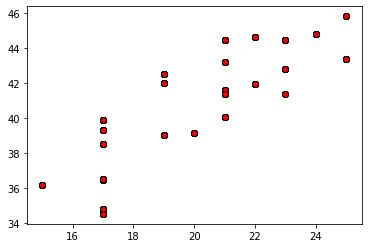

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = capomulin_test_group['Weight (g)']
tumor = capomulin_test_group['Tumor Volume (mm3)']
plt.scatter(weight, tumor, marker="o", facecolors="red", edgecolors="black")
plt.show

## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [68]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, tumor)
vc_fit = vc_slope * weight + vc_int

<function matplotlib.pyplot.show(*args, **kw)>

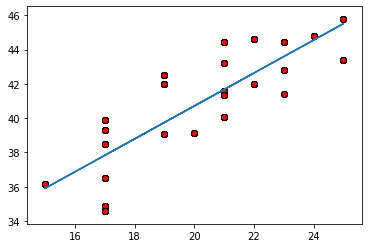

In [69]:
plt.plot(weight,vc_fit)
weight = capomulin_test_group['Weight (g)']
tumor = capomulin_test_group['Tumor Volume (mm3)']
plt.scatter(weight, tumor, marker="o", facecolors="red", edgecolors="black")
plt.show